K-최근접 이웃을 사용하여 2개의 종류 분류

K-최근접 이웃
어떤 데이터에 대한 답을 구할 때 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 사용
즉, 데이터로 부터 거리가 가까운 'k'개의 데이터 레이블을 참조하여 분류하는 알고리즘
여기서 거리는 직선거리를 이용하여 계산

KNeighborsClassifier()은 p 매개변수로 거리 재는 방법을 지정

p = 1인 경우 맨해튼 거리, p = 2인 경우 유클리디안 거리를 사용

(맨해튼 거리 : 수평 및 수직으로 잰 거리)

(유클리디안 거리 : 두 점사이의 거리)

In [3]:
#필요한 라이브러리 불러오기
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [5]:
#도미 데이터 준비하기
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0] #도미 생선의 길이
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0] #도미 생선의 무게

In [6]:
# 빙어 데이터 준비하기
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0] #빙어 생선의 길이
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9] #빙어 생선의 무게


여기서 길이와 무게를 특성(feature)이라고 함

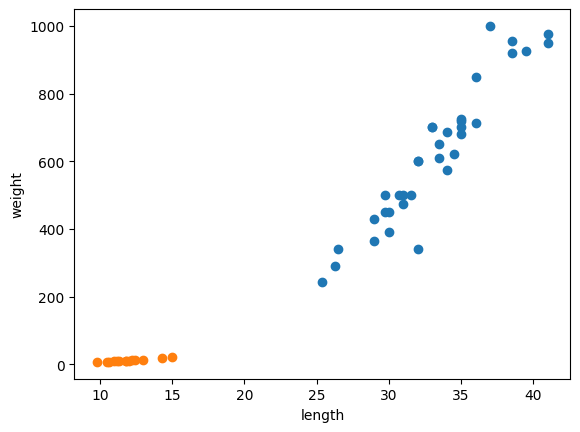

In [7]:
#matplotlib의 scatter이용하여 두 생선의 산점도 그래프 시각화 하기
plt.scatter(bream_length, bream_weight) #도미의 길이와 무게를 산점도 그래프로 나타냄
plt.scatter(smelt_length, smelt_weight) #빙어의 길이와 무게를 산점도 그래프로 나타냄
plt.xlabel('length') #x축 이름
plt.ylabel('weight') #y축 이름
plt.show()

시각화를 통해 데이터의 분포, 밀도 등 데이터를 더 잘 이해하고 앞으로 할 작업에 대한 힌트를 얻을 수 있음

산점도란 좌표상의 점들을 표시함으로써 두 개 변수 간의 관계를 나타내는 그래프 방법

In [9]:
#도미와 빙어의 리스트를 하나로 합침
length = bream_length+smelt_length
weight = bream_weight+smelt_weight

#K-NN알고리즘을 사용하기 위해 길이와 무레를 2차원 리스트로 만듬
fish_data = [[l, w] for l, w in zip(length, weight)] #zip함수는 나열된 리스트에서 원소를 하나씩 꺼내줌, l은 길이, w는 무게를 나타냄

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [11]:
#정답 데이터를 만들기 위해 1, 0을 레이블로 지정 
#도미 데이터의 개수가 35개 이므로 도미를 1로 지정한 후 곱 연산을 이용하여 35개를 만듬.
#빙어 데이터의 개수가 14개 이므로 빙어를 0으로 지정한 후 곱 연산을 이용하여 14개 만듬
fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
kn = KNeighborsClassifier()

In [13]:
#fit 메서드를 이용히여 fish_data와 fish_target 학습
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [23]:
#모델 평가 메서드인 score사용
#score은 0~1사이값을 반환
#출력값은 정확도
kn.score(fish_data, fish_target)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [15]:
# predict 메서드를 이용하여 새로운 데이터 [[30, 600]] 즉, 길이 30, 무게 600인 생선의 정답을 예측
kn.predict([[30, 600]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1])

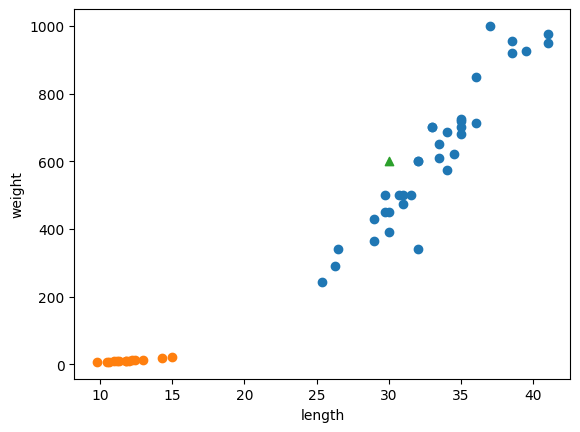

In [16]:
# 새로운 데이터가 어느 데이터와 가까운지 확인하기 위해 시각화
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^') # 새로운 데이터는 marker = '^'로 인해 세모모양으로 나타남
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [19]:
print(kn._fit_X)
print(kn._y)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


KNN은 가장 가까운 데이터를 참고. n_neighbors 매개변수를 바꾸어 가까운 몇 개의 데이터를 참고하는 지 바꿀 수 있음. 기본값은 5. 즉, 5개의 가까운 데이터를 참고.

In [20]:
#참고 데이터를 49개로 변경
kn49 = KNeighborsClassifier(n_neighbors=49)

In [21]:
#위의 방법대로 fir 매소드를 이용하여 학습 후 score 매소드를 통해 모델 평가
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7142857142857143

총 생선 개수 49개 중 35개가 도미이므로 어떤 새로운 데이터를 모델에 넣어도 도미로 에측할 것이다. 따라서 정답 확률은 35/49 = 0.7142857142857143 으로 출력될 것이다.

In [22]:
print(35/49)

0.7142857142857143


KNN은 높은 정확도를 나타내는데 장점이 있지만 데이터 양이 많아 질 수록 계산량이 많아지는 단점이 있다.

예제 문제

 본문56쪽에서 n一nelghbors를 49로 설정했을 때 점수가 1.0보다 작았습니다. 즉 정확도가 100%가 아닙니다. 그럼 n_neighbors의 기본값인 5부터 49까지 바꾸어 가며 점수가 1.0 아래로 내려가기 시작하는 이웃의 개수를 찾아보세요. 이 문제를 위해 KNeighborsClassifier 클래스 객체를 매번 다시 만들 필요는 없습니다. 심지어 fit() 메서드로 훈련을 다시 할 필요도 없습니다. kᅳ최근접이웃알고리즘의 훈련은 데이터를 저장하는 것이 전부이기 때문입니다. KNeighborsClassifier 클래스의 이웃 개수는 모텔 객체의 n_neighbors 속성으로바꿀수있습니다. 이웃 개수를 바꾼 후 score() 메서드로 다시 계산하기만 하면 됩니다.

In [24]:
for n in range(5, 50):
    #k-최근접 이웃 개수 설정
    kn.n_neighbors = n
    #점수 계산
    score = kn.score(fish_data, fish_target)
    #100% 정확도에 미치지 못하는 이웃 개수 출력
    if score < 1:
        print(n, score)
        break

18 0.9795918367346939


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will 